In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 12s 1us/step


In [3]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [4]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

In [5]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


<Figure size 640x480 with 1 Axes>

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 64s - loss: 0.2446 - acc: 0.9290 - val_loss: 0.1200 - val_acc: 0.9626
Epoch 2/10
 - 53s - loss: 0.0995 - acc: 0.9705 - val_loss: 0.0812 - val_acc: 0.9746
Epoch 3/10
 - 46s - loss: 0.0655 - acc: 0.9800 - val_loss: 0.0774 - val_acc: 0.9758
Epoch 4/10
 - 52s - loss: 0.0470 - acc: 0.9859 - val_loss: 0.0734 - val_acc: 0.9783
Epoch 5/10
 - 53s - loss: 0.0360 - acc: 0.9894 - val_loss: 0.0666 - val_acc: 0.9816
Epoch 6/10
 - 59s - loss: 0.0271 - acc: 0.9916 - val_loss: 0.0647 - val_acc: 0.9823
Epoch 7/10
 - 51s - loss: 0.0207 - acc: 0.9935 - val_loss: 0.0671 - val_acc: 0.9814
Epoch 8/10
 - 45s - loss: 0.0159 - acc: 0.9951 - val_loss: 0.0689 - val_acc: 0.9816
Epoch 9/10
 - 55s - loss: 0.0121 - acc: 0.9962 - val_loss: 0.0682 - val_acc: 0.9828
Epoch 10/10
 - 51s - loss: 0.0098 - acc: 0.9970 - val_loss: 0.0743 - val_acc: 0.9817


In [10]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07431343323401834
Test accuracy: 0.9817


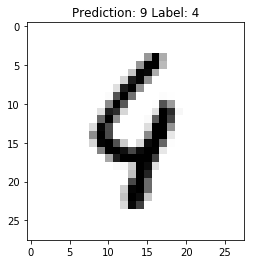

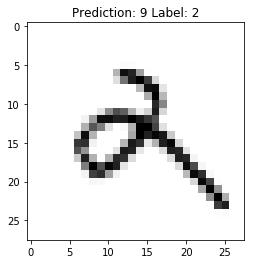

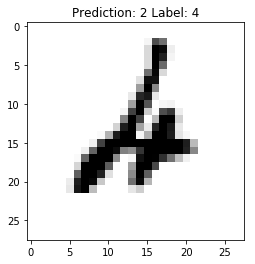

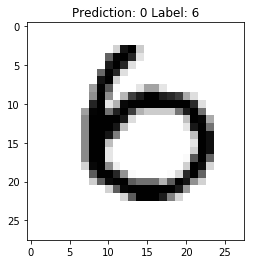

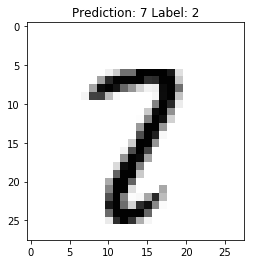

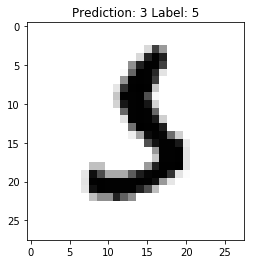

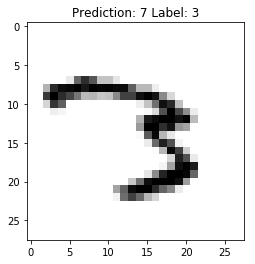

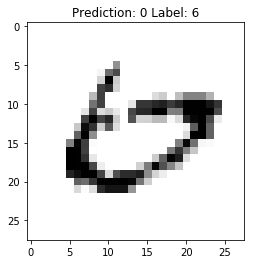

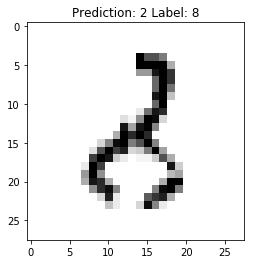

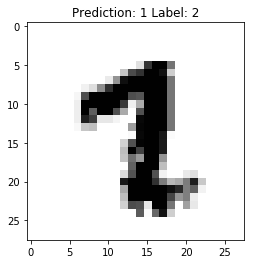

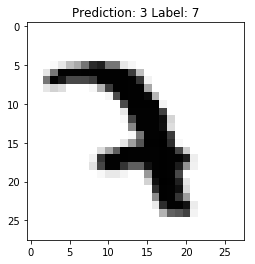

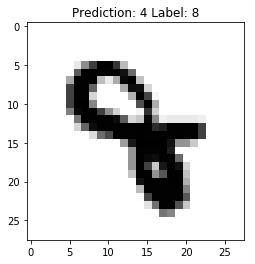

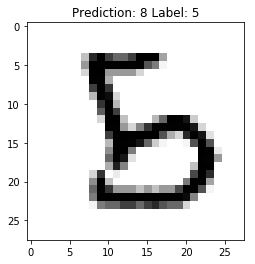

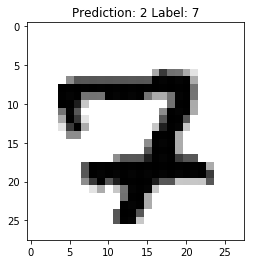

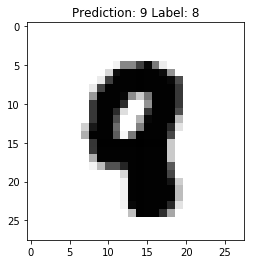

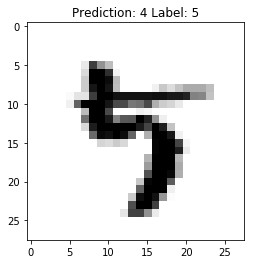

In [11]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()